In [21]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [23]:
all_res = glob('out/**/*.pkl')

In [24]:
all_res

[]

In [25]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    num_points = loaded['num_train_points']

    metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    gpr_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['gpr_baseline']['mean_absolute_error'],
        'max_error': loaded['gpr_baseline']['max_error'],
        'mse': loaded['gpr_baseline']['mean_squared_error']
    }

    compiled_gpr.append(gpr_metrics)

In [26]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [27]:
compiled_res

""


In [28]:
compiled_grouped_res = compiled_res.groupby('num_train_points').agg(['mean', 'std'])

KeyError: 'num_train_points'

In [29]:
compiled_gpr_grouped = compiled_gpr.groupby(['num_train_points']).agg(['mean', 'std'])

KeyError: 'num_train_points'

In [30]:
compiled_grouped_res

NameError: name 'compiled_grouped_res' is not defined

NameError: name 'compiled_grouped_res' is not defined

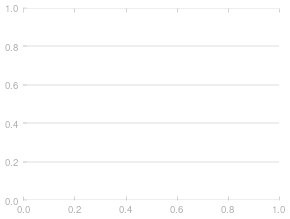

In [31]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)
    ax.plot(
        compiled_grouped_res.loc["SELFIES", :].index, 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'], 
        label='GPT SELFIES', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["SELFIES", :].index, 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] - compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] + compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'], 
        label='GPT SMILES',
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] - compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] + compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
        alpha=.5
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index, 
        compiled_gpr_grouped['mae']['mean'], 
        label='GPR baseline',
        marker='o'
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[ :].index, 
        compiled_gpr_grouped.loc[:]['mae']['mean'] - compiled_gpr_grouped.loc[ :]['mae']['std'], 
        compiled_gpr_grouped.loc[ :]['mae']['mean'] + compiled_gpr_grouped.loc[ :]['mae']['std'], 
        alpha=.5
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top('MAE / eV')
    #ax.set_xscale('log')

fig.savefig('opv_regression_res.pdf', bbox_inches='tight')
